In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

print(tf.__version__)

2.14.0


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Normalization and Reshaping

In [3]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0


In [4]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

tf.Tensor([0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], shape=(10,), dtype=float32)


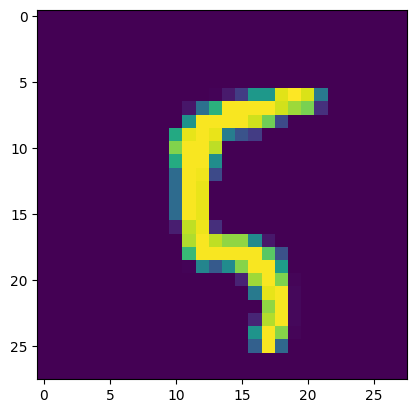

In [5]:
plt.imshow(x_train[100][:,:,0])
print(y_train[100])

In [6]:
batch_size = 64
num_classes = 10
epochs = 5

**Model Describe**

The model is constructed by stacking various layers on top of each other, with the output of one layer serving as the input for the next. Conv2D layers perform convolutions, using filters to transform specific regions of the image. The first two Conv2D layers employ 32 filters of size 5x5, while the subsequent two layers use 64 filters of size 3x3. These filters are applied across the entire image.
MaxPool2D downsamples the image by reducing a 2x2 matrix to a single pixel, preserving essential features while reducing the image size.
Dropout acts as a regularization layer, randomly ignoring 25% of the nodes in the layer. This encourages the network to learn diverse features, preventing overfitting.
Relu, the rectifier activation function, introduces nonlinearity into the data. For input values greater than or equal to 0, it returns the input value; otherwise, it returns 0.
Flatten reshapes the tensors into a 1D vector.
The final layer outputs the probability of each image belonging to a particular class.
Given that the model's goal is to classify images, the categorical_crossentropy loss function is employed.

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1,
                    callbacks=[callbacks])

Epoch 1/5
844/844 [==============================] - 28s 12ms/step - loss: 0.2118 - acc: 0.9345 - val_loss: 0.0458 - val_acc: 0.9863
Epoch 2/5
844/844 [==============================] - 10s 11ms/step - loss: 0.0764 - acc: 0.9773 - val_loss: 0.0322 - val_acc: 0.9910
Epoch 3/5
844/844 [==============================] - 7s 9ms/step - loss: 0.0573 - acc: 0.9842 - val_loss: 0.0321 - val_acc: 0.9900
Epoch 4/5
844/844 [==============================] - 6s 7ms/step - loss: 0.0491 - acc: 0.9859 - val_loss: 0.0296 - val_acc: 0.9917
Epoch 5/5
844/844 [==============================] - 7s 8ms/step - loss: 0.0441 - acc: 0.9873 - val_loss: 0.0330 - val_acc: 0.9912


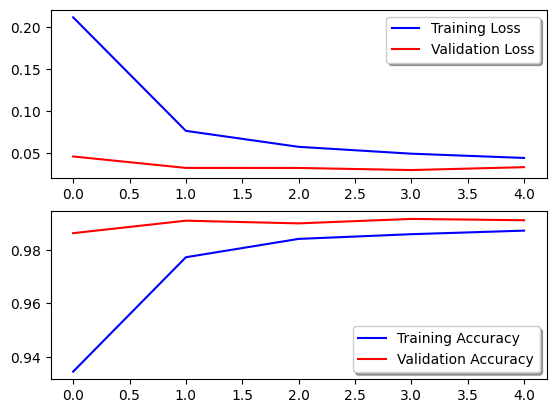

In [10]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0233 - acc: 0.9915


In [12]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

313/313 [==============================] - 1s 2ms/step


<Axes: >

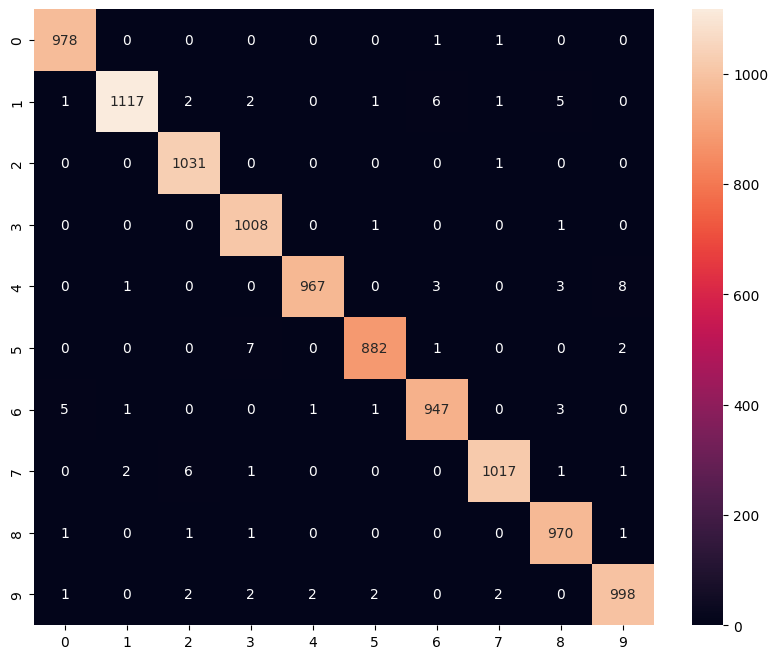

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')